In [121]:
# Variance
# (how much variance or how spreaded data is)
# n = number of samples
# Xi = feature
# X_mean = mean of a computed X

# var(X) = 1/n sum(Xi - X_mean)**2

In [122]:
# Covariance Matrix
# (indicates the level to which two variables vary together)

# cov(X, Y) = 1/n sum(Xi - X_mean)*transformed(Yi - Y_mean) *what is this Y actually??
# cov(X, X) = 1/n sum(Xi - X_mean)*transformed(Xi - X_mean)

In [123]:
# Eigenvector, Eigenvalues
# (the eigenvectors point in the direction of the maximum variance and the coresponding eigenvalues
# indicate the importance of its corresponding eigen vector)

# Av→ = lambda v→ (??What does this do)

In [124]:
# Aproach
# substract the mean from X
# calculate Cov(X, X)
# calculate eigenvectors and eigenvalues of covariance matrix
# sort the eigenvectors according to their eigenvalues in decreasing order
# chose first k eigenvectors and that will be new k dimensions
# transform the original n dimensional datapoints into k dimensions (=projections with dot product)

In [125]:
import numpy as np

class PCA:
    def __init__(self, number_components):
        self.number_components = number_components
        self.components = None
        self.mean = None
    
    def fit(self, X):
        # mean
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        
        # covariance matrix
        covariance = np.cov(X.T)
        
        # eigenvectors, eigenvalues
        eigenvalues, eigenvectors = np.linalg.eig(covariance)
        
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        indexes = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[indexes]
        eigenvectors = eigenvectors[indexes]
        
        # store first "n" eigenvectors
        self.components = eigenvectors[0:self.number_components]
        
    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

In [126]:
from data_generation import GenerateDatasets

dataset = GenerateDatasets()
dataset = dataset.make_blobs(nr_blobs=4,
                   nr_samples=400,
                   nr_cols=2,
                   size_left=1,
                   mode=1.5,
                   size_right=2,
                   scale_row=0.8,
                   scale_col=0.8,
                   random_seed=True)
X, y = dataset

In [127]:
# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
X[:10], y[:10]

(array([[1.75910218, 1.46284487, 1.17327753],
        [2.15579428, 2.28966759, 2.37534743],
        [3.1080264 , 1.11886003, 1.61974691],
        [2.98940919, 1.33763427, 1.24058011],
        [2.0835954 , 2.48725643, 2.45181663],
        [3.0735634 , 1.39545905, 1.40731099],
        [1.92134085, 1.53369879, 1.37067178],
        [1.40664439, 1.71562465, 1.73415137],
        [3.9776178 , 2.1591442 , 1.84543378],
        [1.17923596, 1.19632295, 1.39023926]]),
 array([0, 1, 2, 2, 1, 2, 0, 0, 3, 0]))

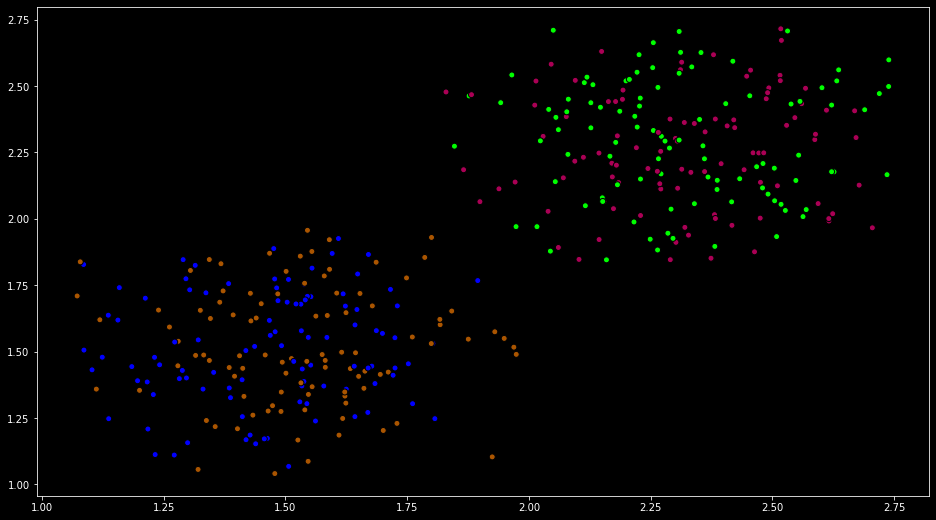

In [135]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")
plt.figure(figsize=(16, 9))
plt.scatter(X[:, 1], X[:, 2], c=y, cmap="brg", edgecolors="k")
plt.show()

In [130]:
pca = PCA(2)
pca.fit(X_train[:, 1:3])
X_projected = pca.transform(X_test[:, 1:3])

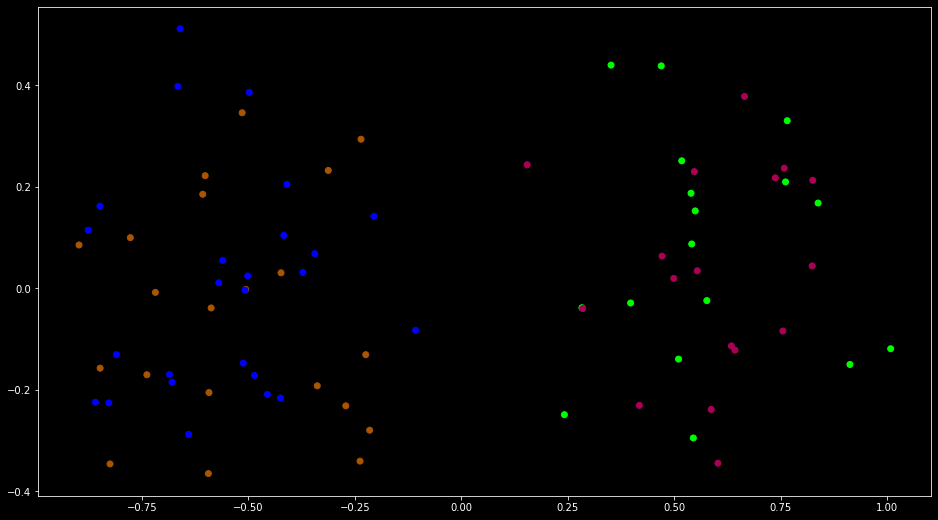

In [131]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.figure(figsize=(16, 9))
plt.scatter(x1, x2, c=y_test, cmap=plt.cm.get_cmap("brg"))
plt.show()